<center><h1> Webscraping Project - Royallepage</h1> </center>

<center><h3> TIANYUAN XU & XINZHEN FAN</h3> </center>

# Table of Contents

1. [Install Required Libraries](#1.-Install-Required-Libraries)
2. [Data Scraping](#2.-Data-Scraping)
3. [Data Cleaup](#3.-Data-Cleanup)
4. [Analysis and Graphics](#4.-Analysis-and-Graphics)

## 1. Install  Required Libraries

In [1]:
# imports
!pip install geopy
!pip install folium
from bs4 import BeautifulSoup 
import requests 
from time import sleep 
from collections import Counter 
import pandas as pd 
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
%matplotlib inline

## 2. Data Scraping

### 2.1 Test web respons by bs4

In [2]:
## test whether web will block us
url = 'https://www.royallepage.ca/en/search/homes/bc/vancouver/1/?property_type=&house_type=&features=&listing_type=&lat=49.26163600000007&lng=-123.11334999999997&bypass=&address=Vancouver&address_type=city&city_name=Vancouver&prov_code=BC&display_type=gallery-view&da_id=&travel_time=false&school_id=&search_str=Vancouver%2C+BC%2C+CAN&id_search_str=Vancouver%2C+BC%2C+CAN&school_search_str=&travel_time_min=30&travel_time_mode=drive&travel_time_congestion=&min_price=0&max_price=5000000%2B&min_leaseprice=0&max_leaseprice=5000%2B&beds=0&baths=0&transactionType=SALE&keyword='
result = requests.get(url)
result.status_code

200

### 2.2 Create Dictionary to Store Values

In [3]:
## build a dict
details = {
           'types':[],
           'bds':[],
           'bths':[],
           'price':[],
           'address':[],
           'region':[],
           'realty':[]
           }


### 2.3 Data Scraping 

In [4]:
## Define fucntion to go to every page
def get_page(page):  
    url = f'https://www.royallepage.ca/en/search/homes/bc/vancouver/{page}/?property_type=&house_type=&features=&listing_type=&lat=49.26163600000007&lng=-123.11334999999997&bypass=&address=Vancouver&address_type=city&city_name=Vancouver&prov_code=BC&display_type=gallery-view&da_id=&travel_time=false&school_id=&search_str=Vancouver%2C+BC%2C+CAN&id_search_str=Vancouver%2C+BC%2C+CAN&school_search_str=&travel_time_min=30&travel_time_mode=drive&travel_time_congestion=&min_price=0&max_price=5000000%2B&min_leaseprice=0&max_leaseprice=5000%2B&beds=0&baths=0&transactionType=SALE&keyword='
  
    result = requests.get(url)
    soup = BeautifulSoup(result.content)
    return soup
    

## set up for loop to collect data in page in set up range   
for page_num in range(1,31):  
        soup = get_page(page_num)


        
        ## types
        for tag in soup.find_all('div',class_='listing-meta listing-meta--small'):
            try:
                details['types'].append(tag.span.get_text(strip=True))
            except:
                 details['types'].append('missing')
                



        ## bedrooms number
        for tag in soup.find_all('div',class_='listing-meta listing-meta--small'):
                try:
                    details['bds'].append(int(list(tag.children)[3].get_text(strip = True)[0]))
                except:
                    details['bds'].append(0) ## some property doesnt have bedroom like comercial

        ## bathrooms number
        for tag in soup.find_all('div',class_='listing-meta listing-meta--small'):
                try:
                    details['bths'].append(int(list(tag.children)[3].get_text(strip = True).replace(' ','')[-6]))
                except:
                    details['bths'].append(0) ## some property doesnt have bathrooms like comercial


        ## price
        for tag in soup.find_all('span',class_='title--h3 price'):
            try:
                details['price'].append(tag.span.get_text(strip=True))
            except:
                details['price'].append(0)
                


        ## address
        for tag in soup.find_all('address',class_='address-1'):
            try:
                details['address'].append(tag.get_text(strip=True))
            except:
                details['address'].append('missing')
                


        ## region
        for tag in soup.find_all('address',class_='card__address-2'):
            try:
                details['region'].append(tag.get_text(strip = True).split(',')[0])
            except:
                details['region'].append('missing')

        ## belong to which realty company
        for tag in soup.find_all('div',class_='card__body'):
                try:
                    details['realty'].append(list(tag.children)[8].get_text(strip = True).split(':')[-1])
                except:
                    details['realty'].append('missing')

In [5]:
## check dict
details

{'types': ['House',
  'House',
  'House',
  'Commercial',
  'Commercial',
  'House',
  'House',
  'Condo',
  'House',
  'House',
  'House',
  'House',
  'Condo',
  'House',
  'House',
  'House',
  'House',
  'House',
  'Condo',
  'House',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Commercial',
  'Commercial',
  'Commercial',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'Condo',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'Condo',
  'House',
  'Condo',
  'House',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'Condo',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'House',
  'Condo',
  'House',
  'House'

### 2.4 Set data into Pandas DataFrame and save to csv

In [6]:
## set dict to dataframe
df = pd.DataFrame(details)

In [7]:
## check dataframe type
df.dtypes

types      object
bds         int64
bths        int64
price      object
address    object
region     object
realty     object
dtype: object

In [8]:
df

,types,bds,bths,price,address,region,realty
0,House,2,3,"$1,799,000",4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,"$2,758,000",3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,"$1,349,900",1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,"$418,000",10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,"$178,000",3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1375,Condo,1,1,"$575,000",1003 550 Taylor Street,Vancouver,Faith Wilson Group
1376,Condo,1,1,"$499,000",304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1377,Commercial,0,0,"$299,000",6459 Victoria Drive,Vancouver,SaveEditRemoveView
1378,House,6,8,"$14,980,000",1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [9]:
## save data 
df.to_csv('realestate1.csv',index=False,mode='a',header=True)

## 3. Data Cleanup

## 3.1 Read the csv file and check every data types

In [704]:
realestate = pd.read_csv('realestate1.csv')

In [918]:
realestate

,types,bds,bths,price,address,region,realty
0,House,2,3,"$1,799,000",4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,"$2,758,000",3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,"$1,349,900",1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,"$418,000",10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,"$178,000",3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1375,Condo,1,1,"$575,000",1003 550 Taylor Street,Vancouver,Faith Wilson Group
1376,Condo,1,1,"$499,000",304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1377,Commercial,0,0,"$299,000",6459 Victoria Drive,Vancouver,SaveEditRemoveView
1378,House,6,8,"$14,980,000",1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [919]:
realestate.dtypes

types      object
bds         int64
bths        int64
price      object
address    object
region     object
realty     object
dtype: object

### 3.2 Convert `str` type to `float` in `price` column

In [920]:
## make a copy of original dataframe
realestate_copy = realestate.copy()

In [921]:
realestate_copy

,types,bds,bths,price,address,region,realty
0,House,2,3,"$1,799,000",4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,"$2,758,000",3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,"$1,349,900",1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,"$418,000",10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,"$178,000",3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1375,Condo,1,1,"$575,000",1003 550 Taylor Street,Vancouver,Faith Wilson Group
1376,Condo,1,1,"$499,000",304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1377,Commercial,0,0,"$299,000",6459 Victoria Drive,Vancouver,SaveEditRemoveView
1378,House,6,8,"$14,980,000",1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [922]:
## check null value in price column
realestate_copy[realestate_copy['price'].isnull()]

,types,bds,bths,price,address,region,realty


In [923]:
## remove '$' and convert price to float
realestate_copy['price'] = realestate_copy['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)

In [924]:
## most price are higher than 1 miilion , so to avoid scientific number in chart later, just use million as count unit
realestate_copy['price'] = realestate_copy['price']/1000000

In [925]:
realestate_copy = realestate_copy.rename(columns={'price': 'price(million)'})

In [926]:
realestate_copy

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,0.418,10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,0.178,3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1375,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1376,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1377,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver,SaveEditRemoveView
1378,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1039]:
## check new dataframe type
realestate_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   types           1380 non-null   object 
 1   bds             1380 non-null   int64  
 2   bths            1380 non-null   int64  
 3   price(million)  1380 non-null   float64
 4   address         1380 non-null   object 
 5   region          1380 non-null   object 
 6   realty          1380 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 75.6+ KB


In [1040]:
df = realestate_copy

In [1041]:
## drop duplicates rows
df = df.drop_duplicates()

In [1042]:
df

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,0.418,10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,0.178,3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1007,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1008,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1009,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver,SaveEditRemoveView
1010,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1043]:
df.to_csv('realestate_cleaup.csv',index=False,mode='a',header=True)

### 3.3 Expand data frame by realty

one property may have more than 1 realty company ,so We have to split them for easier to group by each unique realty later

In [1031]:
## make a new copy of dataframe
realestate_copy1 = realestate_copy.copy()

In [1032]:
realestate_copy1

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,0.418,10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,0.178,3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1375,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1376,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1377,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver,SaveEditRemoveView
1378,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [982]:
## find realty column
realestate_copy1['realty']

0                                        Macdonald Realty
1        Sutton Group-West Coast Realty, Sotheby's Int...
2                                        Macdonald Realty
3                                      SaveEditRemoveView
4                                      SaveEditRemoveView
                              ...                        
1375                                   Faith Wilson Group
1376                      Coldwell Banker Prestige Realty
1377                                   SaveEditRemoveView
1378                       Sutton Group-West Coast Realty
1379                          VIRANI REAL ESTATE ADVISORS
Name: realty, Length: 1380, dtype: object

In [983]:
realestate_copy1[realestate_copy1['realty'].isnull()]

,types,bds,bths,price(million),address,region,realty


In [984]:
## make new series of lists by splitting the realty within each row
realty = realestate_copy1['realty'].str.split(',')

In [988]:
realty

0                                     [ Macdonald Realty]
1       [ Sutton Group-West Coast Realty,  Sotheby's I...
2                                     [ Macdonald Realty]
3                                    [SaveEditRemoveView]
4                                    [SaveEditRemoveView]
                              ...                        
1375                                [ Faith Wilson Group]
1376                   [ Coldwell Banker Prestige Realty]
1377                                 [SaveEditRemoveView]
1378                    [ Sutton Group-West Coast Realty]
1379                       [ VIRANI REAL ESTATE ADVISORS]
Name: realty, Length: 1380, dtype: object

In [989]:
## make new list to expand each realty into a new row
realty1 = []
for a in range (len(realty)):
    for b in realty[a]:
        realty1.append(b)

In [990]:
len(realty1)

1433

In [991]:
## convert the list into DataFrame
realty2 = pd.DataFrame(realty1,columns=['realty'])

In [992]:
realty2

,realty
0,Macdonald Realty
1,Sutton Group-West Coast Realty
2,Sotheby's International Realty Canada
3,Macdonald Realty
4,SaveEditRemoveView
...,...
1428,Faith Wilson Group
1429,Coldwell Banker Prestige Realty
1430,SaveEditRemoveView
1431,Sutton Group-West Coast Realty


In [993]:
## find unique realty
realty3 = pd.unique(realty1)

In [994]:
realty3

array([' Macdonald Realty', ' Sutton Group-West Coast Realty',
       " Sotheby's International Realty Canada", 'SaveEditRemoveView',
       ' Laboutique Realty', ' RE/MAX Crest Realty',
       ' Century 21 In Town Realty', ' Royal LePage Sussex',
       ' Homeland Realty', ' Sunstar Realty Ltd.',
       ' Sincere Real Estate Services', ' VIRANI REAL ESTATE ADVISORS',
       ' Multiple Realty Ltd.', ' Sutton Group - Vancouver First Realty',
       ' Dexter Realty', ' Dracco Pacific Realty',
       ' Coldwell Banker Prestige Realty',
       ' Pacific Evergreen Realty Ltd.',
       ' Royal Pacific Tri-Cities Realty', ' Oakwyn Realty Ltd.',
       ' RE/MAX All Points Realty', ' Engel & Volkers Vancouver',
       ' Royal Pacific Realty Corp.', ' eXp Realty',
       ' Royal LePage Sterling Realty', ' Macdonald Realty (Langley)',
       ' Heller Murch Realty', ' Sutton Group - 1st West Realty',
       ' RE/MAX Sabre Realty Group',
       ' Rennie & Associates Realty - Jason Soprovich',
     

In [995]:
realty2.groupby('realty').value_counts()

realty
 88West Realty                  1
 Allie Lau Realty Ltd.          1
 Amex - Fraseridge Realty       1
 Amex Broadway West Realty      3
 Angell                        10
                             ... 
 YVR International Realty       2
 Youlive Realty                 1
 Zolo Realty                    1
 eXp Realty                    21
SaveEditRemoveView            161
Length: 134, dtype: int64

In [996]:
## make a new copy of data frame
realestate_copy2 = realestate_copy1.copy()

In [997]:
## drop the realty column in copy of original DataFrame
realestate_copy2 = realestate_copy2.drop(columns=['realty'])

In [998]:
## check
realestate_copy2 

,types,bds,bths,price(million),address,region
0,House,2,3,1.799,4089 Ash Street,Vancouver
1,House,5,3,2.758,3115 Benbow Road,West Vancouver
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver
3,Commercial,0,0,0.418,10506 Confidential,Vancouver
4,Commercial,0,0,0.178,3364 Cambie Street,Vancouver
...,...,...,...,...,...,...
1375,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver
1376,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver
1377,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver
1378,House,6,8,14.980,1337 Camridge Road,West Vancouver


In [999]:
## build a new dict
details1 = {
           'types':[],
           'bds':[],
           'bths':[],
           'price(million)':[],
           'address':[],
           'region':[],
           
           }


In [1000]:
df=pd.DataFrame(details1)

In [1001]:
realestate_copy2 .shape[0]

1380

In [1002]:
## duplicate each row based on number of realty it has and append to new DataFrame

for a in tqdm(range(realestate_copy2.shape[0])):
    b = len(realty[a])
    df1 = pd.DataFrame(np.repeat([realestate_copy2.loc[a]],b,axis=0),\
                        columns=['types','bds','bths','price(million)','address','region'], index=None)
    df = pd.concat([df,df1])

100%|██████████| 1380/1380 [00:00<00:00, 1869.77it/s]


In [1003]:
## reset index values
df = df.reset_index(drop=True)

In [1004]:
df

,types,bds,bths,price(million),address,region
0,House,2,3,1.799,4089 Ash Street,Vancouver
1,House,5,3,2.758,3115 Benbow Road,West Vancouver
2,House,5,3,2.758,3115 Benbow Road,West Vancouver
3,House,3,3,1.350,1215 E 27th Avenue,Vancouver
4,Commercial,0,0,0.418,10506 Confidential,Vancouver
...,...,...,...,...,...,...
1428,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver
1429,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver
1430,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver
1431,House,6,8,14.980,1337 Camridge Road,West Vancouver


In [1005]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   types           1433 non-null   object
 1   bds             1433 non-null   object
 2   bths            1433 non-null   object
 3   price(million)  1433 non-null   object
 4   address         1433 non-null   object
 5   region          1433 non-null   object
dtypes: object(6)
memory usage: 67.3+ KB


In [1006]:
## add realty column into new dataframe
df['realty'] = realty2

In [1007]:
## check
df['realty'].value_counts()

SaveEditRemoveView                 161
 RE/MAX Crest Realty               107
 Sutton Group-West Coast Realty     86
 Oakwyn Realty Ltd.                 79
 Century 21 In Town Realty          60
                                  ... 
 Swift Realty Ltd.                   1
 Oneflatfee.ca                       1
 Laboutique Realty                   1
 Macdonald Realty (Surrey/152)       1
 Evergreen West Realty               1
Name: realty, Length: 134, dtype: int64

In [1008]:
## check
df.head()

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,Sutton Group-West Coast Realty
2,House,5,3,2.758,3115 Benbow Road,West Vancouver,Sotheby's International Realty Canada
3,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
4,Commercial,0,0,0.418,10506 Confidential,Vancouver,SaveEditRemoveView


In [1009]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   types           1433 non-null   object
 1   bds             1433 non-null   object
 2   bths            1433 non-null   object
 3   price(million)  1433 non-null   object
 4   address         1433 non-null   object
 5   region          1433 non-null   object
 6   realty          1433 non-null   object
dtypes: object(7)
memory usage: 78.5+ KB


In [1010]:
## convert data types as same as original data types
df['bds']=df['bds'].astype(int)

In [1011]:
df['bths']=df['bths'].astype(int)

In [1012]:
df['price(million)'] = df['price(million)'].astype(float)

In [1013]:
## check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   types           1433 non-null   object 
 1   bds             1433 non-null   int32  
 2   bths            1433 non-null   int32  
 3   price(million)  1433 non-null   float64
 4   address         1433 non-null   object 
 5   region          1433 non-null   object 
 6   realty          1433 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 67.3+ KB


### 3.4 Replace 'SaveEditRemoveView' to ' '

some property have realty SaveEditRemoveView which means not belong to any realty company

In [1014]:
## replace every SaveEditRemoveView to white space
df['realty'] = df['realty'].str.replace('SaveEditRemoveView','')

In [1015]:
##check
df.head()

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,Sutton Group-West Coast Realty
2,House,5,3,2.758,3115 Benbow Road,West Vancouver,Sotheby's International Realty Canada
3,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
4,Commercial,0,0,0.418,10506 Confidential,Vancouver,


In [1016]:
df.dtypes

types              object
bds                 int32
bths                int32
price(million)    float64
address            object
region             object
realty             object
dtype: object

In [1022]:
## frop all duplicates row
df = df.drop_duplicates()

In [1023]:
df

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,Sutton Group-West Coast Realty
2,House,5,3,2.758,3115 Benbow Road,West Vancouver,Sotheby's International Realty Canada
3,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
4,Commercial,0,0,0.418,10506 Confidential,Vancouver,
...,...,...,...,...,...,...,...
1060,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1061,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1062,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver,
1063,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1021]:
## save data 
df.to_csv('realestate_finalversion.csv',index=False,mode='a',header=True)

## 4. Analysis and Graphics

In [2]:
## df1 for most analysis
df1 = pd.read_csv('realestate_cleaup.csv')
## df2 for realty company analysis
df2 = pd.read_csv('realestate_finalversion.csv')

In [3]:
df1

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.7990,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.7580,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.3499,1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,0.4180,10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,0.1780,3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1006,Condo,1,1,0.5750,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1007,Condo,1,1,0.4990,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1008,Commercial,0,0,0.2990,6459 Victoria Drive,Vancouver,SaveEditRemoveView
1009,House,6,8,14.9800,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [4]:
df2

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.7990,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.7580,3115 Benbow Road,West Vancouver,Sutton Group-West Coast Realty
2,House,5,3,2.7580,3115 Benbow Road,West Vancouver,Sotheby's International Realty Canada
3,House,3,3,1.3499,1215 E 27th Avenue,Vancouver,Macdonald Realty
4,Commercial,0,0,0.4180,10506 Confidential,Vancouver,NaN
...,...,...,...,...,...,...,...
1058,Condo,1,1,0.5750,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1059,Condo,1,1,0.4990,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1060,Commercial,0,0,0.2990,6459 Victoria Drive,Vancouver,NaN
1061,House,6,8,14.9800,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


### 4.1 General Distribution by Region and Realty

In [1169]:
df1['types'].value_counts()

Condo          514
House          436
Commercial      48
Vacant Land      6
Townhouse        5
Investment       2
Name: types, dtype: int64

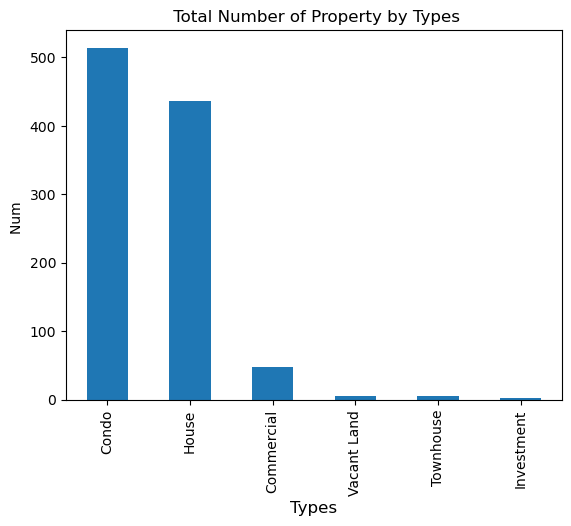

In [1170]:
## build bar chart for all property distribution 
df1['types'].value_counts().plot(kind='bar',title=' Total Number of Property by Types')
plt.xlabel('Types', fontsize=12)
plt.ylabel('Num ',fontsize=10);

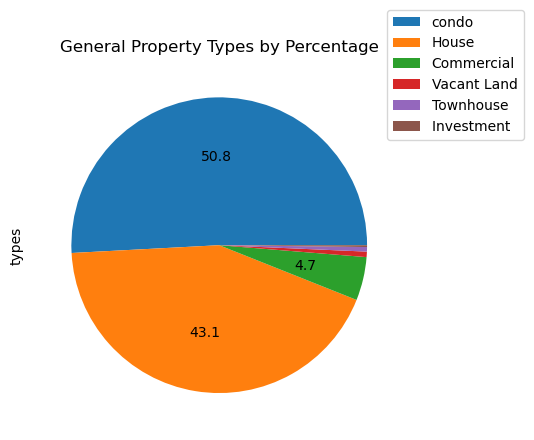

In [1171]:
## build pie chart for all property distribution 
df1['types'].value_counts().plot(kind='pie',autopct=lambda x: format(x,'.1f') if x>1 else None, labels=None,title='General Property Types by Percentage');
plt.legend(labels =['condo','House','Commercial','Vacant Land','Townhouse','Investment  '] , loc="upper right",bbox_to_anchor=(1,1),bbox_transform=plt.gcf().transFigure);

In [1051]:
## build a pivot table for each type of property number distribution in each region
df1.groupby('region')['types'].value_counts().unstack()

types,Commercial,Condo,House,Investment,Townhouse,Vacant Land
region,,,,,,
North Vancouver,5.000,77.000,64.000,NaN,NaN,1.000
Vancouver,43.000,416.000,295.000,2.000,5.000,2.000
West Vancouver,NaN,21.000,77.000,NaN,NaN,3.000


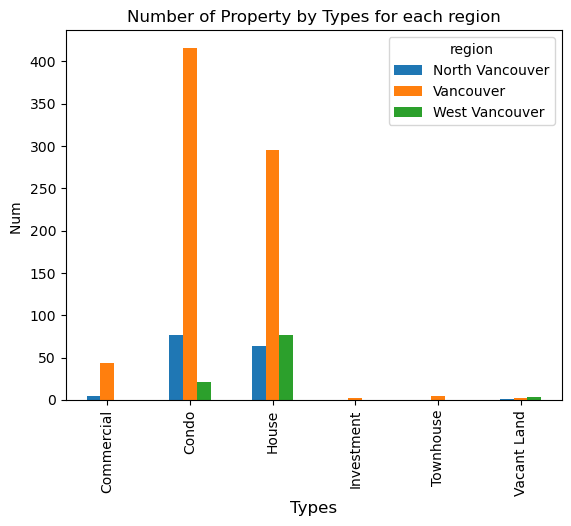

In [1052]:
## build bar chart for property distribution by different region
df1.groupby('types')['region'].value_counts().unstack().plot(kind='bar',title='Number of Property by Types for each region')
plt.xlabel('Types', fontsize=12)
plt.ylabel('Num ',fontsize=10);

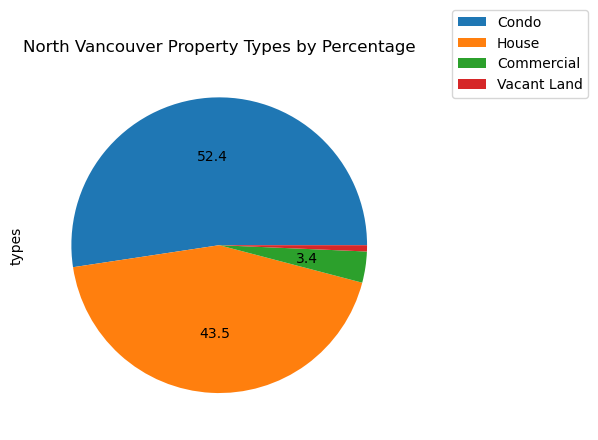

In [1053]:
## build pie chart for property distribution by different region
df1.groupby('region')['types'].value_counts().loc['North Vancouver'].plot(kind='pie',autopct=lambda x: format(x,'.1f') if x>1 else None, labels=None,title='North Vancouver Property Types by Percentage');
plt.legend(labels = ['Condo','House','Commercial','Vacant Land'] , loc="upper right",bbox_to_anchor=(1.1,1),bbox_transform=plt.gcf().transFigure);

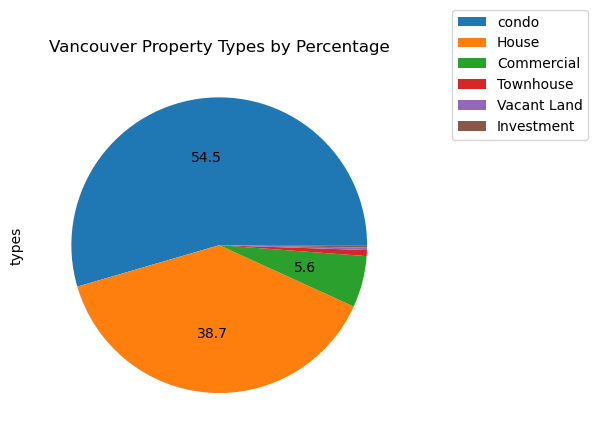

In [1054]:
df1.groupby('region')['types'].value_counts().loc['Vancouver'].plot(kind='pie',autopct=lambda x: format(x,'.1f') if x>1 else None, labels=None,title='Vancouver Property Types by Percentage');
plt.legend(labels = ['condo','House','Commercial','Townhouse','Vacant Land','Investment'] , loc="upper right",bbox_to_anchor=(1.1,1),bbox_transform=plt.gcf().transFigure);

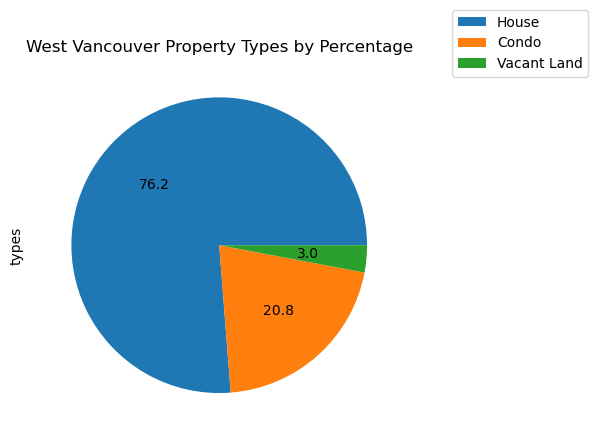

In [1055]:
df1.groupby('region')['types'].value_counts().loc['West Vancouver'].plot(kind='pie',autopct=lambda x: format(x,'.1f') if x>1 else None, labels=None,title='West Vancouver Property Types by Percentage');
plt.legend(labels = ['House','Condo','Vacant Land'], loc="upper right",bbox_to_anchor=(1.1,1),bbox_transform=plt.gcf().transFigure);

In [1056]:
df2['realty'].value_counts()

 RE/MAX Crest Realty               83
 Sutton Group-West Coast Realty    70
 Oakwyn Realty Ltd.                62
 Royal LePage Sussex               43
 Macdonald Realty                  39
                                   ..
 Planet Group Realty Inc.           1
 Swift Realty Ltd.                  1
 Oneflatfee.ca                      1
 Macdonald Realty (Surrey/152)      1
 Birds Nest Properties              1
Name: realty, Length: 133, dtype: int64

In [1057]:
counts = df2['realty'].value_counts() 


In [1061]:

filtered_counts = counts[counts >= 30]


In [1062]:
filtered_counts

 RE/MAX Crest Realty               83
 Sutton Group-West Coast Realty    70
 Oakwyn Realty Ltd.                62
 Royal LePage Sussex               43
 Macdonald Realty                  39
 RE/MAX Masters Realty             34
 Stilhavn Real Estate Services     30
Name: realty, dtype: int64

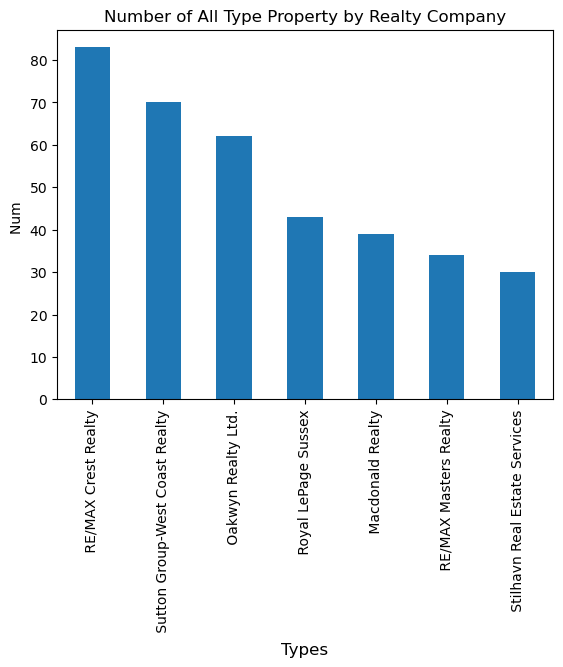

In [1063]:
filtered_counts.plot(kind='bar',title='Number of All Type Property by Realty Company')
plt.xlabel('Types', fontsize=12)
plt.ylabel('Num ',fontsize=10);

### 4.2 House Price Analysis

#### 4.21 General House Price

In [1064]:
df1

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,0.418,10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,0.178,3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1006,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1007,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1008,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver,SaveEditRemoveView
1009,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1065]:
## general look for house price in each region
house = df1[(df1['types']== 'House')]
house

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
5,House,5,7,18.000,1428 Devonshire Crescent,Vancouver,Laboutique Realty
6,House,3,4,6.099,1903 W 19th Avenue,Vancouver,RE/MAX Crest Realty
...,...,...,...,...,...,...,...
996,House,4,4,1.480,175 2035 Glenaire Drive,North Vancouver,RE/MAX Masters Realty
997,House,2,3,1.399,5408 Larch Street,Vancouver,Keller Williams Realty VanCentral
1002,House,2,2,1.139,100 1068 Hornby Street,Vancouver,Oakwyn Realty Ltd.
1009,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1066]:
## find average price for different number of bedrooms for each region
house_g = house.groupby(['region', 'bds'])['price(million)'].mean().round(2)
house_g

region           bds
North Vancouver  1      1.560
                 2      1.570
                 3      1.860
                 4      2.120
                 5      1.930
                 6      2.950
                 7      3.050
                 8      4.000
                 9      3.700
Vancouver        0      2.500
                 1      1.020
                 2      1.870
                 3      1.960
                 4      3.530
                 5      3.990
                 6      3.830
                 7      4.060
                 8      3.650
                 9      4.390
West Vancouver   0      2.690
                 2      2.400
                 3      2.810
                 4      4.080
                 5      5.280
                 6      6.130
                 7      6.100
                 8     15.080
Name: price(million), dtype: float64

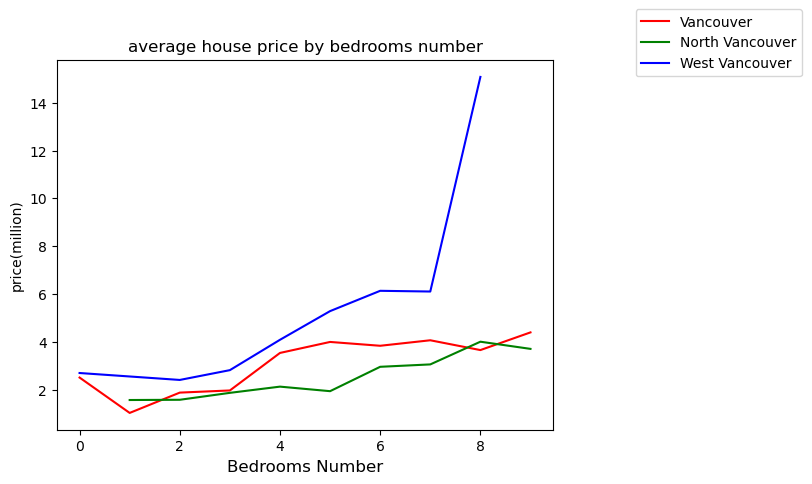

In [1067]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    house_g['Vancouver'].plot(color="r")
    house_g['North Vancouver'].plot(color="g")
    house_g['West Vancouver'].plot(color="b")
    plt.title('average house price by bedrooms number')
    plt.xlabel('Bedrooms Number', fontsize=12);
    plt.ylabel('price(million)', fontsize=10);
    plt.legend(labels = ['Vancouver','North Vancouver','West Vancouver'],loc="upper right",bbox_to_anchor=(1.3,1),bbox_transform=plt.gcf().transFigure)


#### 4.22  House Price by Bedrooms Number

In [1068]:
## house with less then 3 bedrooms
house1 = df1[(df1['types']== 'House') & ( (0 < df1['bds'] )&(df1['bds'] <3 ))]
house1

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
17,House,2,2,1.688,6590 Marine Drive,West Vancouver,Royal LePage Sussex
19,House,2,2,1.299,2165 E Pender Street,Vancouver,Coldwell Banker Prestige Realty
56,House,2,2,1.598,1947 Templeton Drive,Vancouver,"RE/MAX Select Properties, Stilhavn Real Estat..."
94,House,2,3,2.050,5 4923 Larch Street,Vancouver,Engel & Volkers Vancouver
99,House,2,3,1.490,85 W 15th Avenue,Vancouver,Sotheby's International Realty Canada
101,House,2,3,1.250,1845 W 12th Avenue,Vancouver,Homeland Realty
117,House,1,1,0.789,Th18 550 Taylor Street,Vancouver,Royal LePage West Real Estate Services
175,House,2,2,1.258,106 2577 Willow Street,Vancouver,RE/MAX Crest Realty
180,House,1,1,0.998,3k 1077 Marinaside Crescent,Vancouver,RE/MAX Select Realty


In [1069]:

bds2_house = house1.groupby('region')['price(million)'].aggregate(['min','max','mean']).round(2)



bds2_house 

,min,max,mean
region,,,
North Vancouver,0.570,4.000,1.560
Vancouver,0.600,12.800,1.750
West Vancouver,1.690,3.000,2.400


In [1070]:
bds2_house1 = house1[['price(million)','region']]
bds2_house1

,price(million),region
0,1.799,Vancouver
17,1.688,West Vancouver
19,1.299,Vancouver
56,1.598,Vancouver
94,2.050,Vancouver
99,1.490,Vancouver
101,1.250,Vancouver
117,0.789,Vancouver
175,1.258,Vancouver
180,0.998,Vancouver


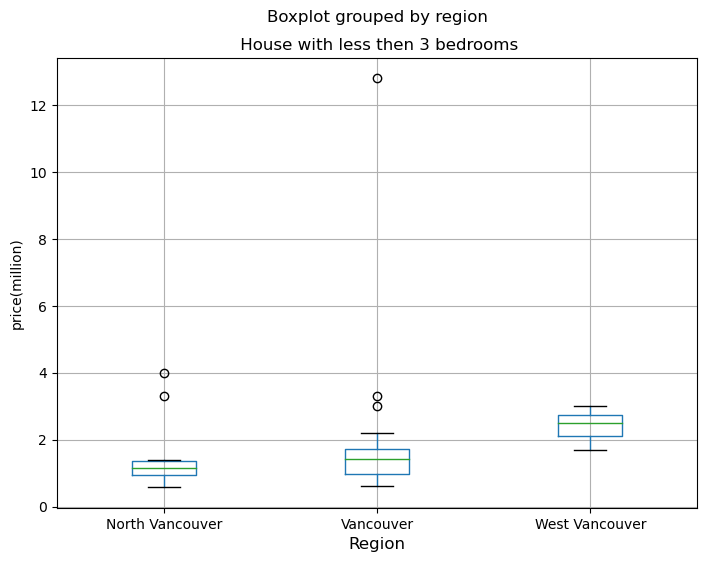

In [1071]:
bds2_house1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' House with less then 3 bedrooms');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1073]:
## Find Top 20 price
bds2_house2 = house1[['price(million)','address']]
bds2_house2.sort_values(by = 'price(million)', ascending=False).head(20)['address']

889             3623 Cameron Avenue
704         2020 & 2036 Larson Road
706         4220 St. Georges Avenue
756              626 Kinghorne Mews
340             575 Robin Hood Road
223    322 1228 Marinaside Crescent
767                410 Eastcot Road
710              3858 W 10th Avenue
94              5 4923 Larch Street
778               2 6 W 17th Avenue
0                   4089 Ash Street
912            1785 Columbia Street
787              12 6 W 17th Avenue
251              4 1855 Vine Street
17                6590 Marine Drive
592                 6150 Oak Street
56             1947 Templeton Drive
792               7 6 W 17th Avenue
261      1608 Pullman Porter Street
918              1338 Walnut Street
Name: address, dtype: object

In [1154]:

##Define the addresses without a city name
addresses = bds2_house2.sort_values(by = 'price(million)', ascending=False).head(20)['address']

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m

In [1075]:
## house with  bedrooms between 3 or 4

house2 = df1[(df1['types']== 'House') & ( (2 < df1['bds'] )&(df1['bds']< 5))]
house2

,types,bds,bths,price(million),address,region,realty
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
6,House,3,4,6.099,1903 W 19th Avenue,Vancouver,RE/MAX Crest Realty
8,House,3,3,3.868,3615 Sunset Lane,West Vancouver,Royal LePage Sussex
9,House,3,3,3.288,2276 W 15th Avenue,Vancouver,Homeland Realty
16,House,3,3,1.698,547 W 29th Avenue,Vancouver,Macdonald Realty
...,...,...,...,...,...,...,...
982,House,3,1,3.498,2016 W 48th Avenue,Vancouver,RE/MAX Crest Realty
988,House,4,4,2.175,2 657 W 14th Street,North Vancouver,SaveEditRemoveView
989,House,3,3,1.998,8081 Yukon Street,Vancouver,RE/MAX Crest Realty
990,House,4,4,1.950,242 E 15th Avenue,Vancouver,TRG The Residential Group Realty


In [1076]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
bds4_house = house2.groupby('region')['price(million)'].aggregate(['min','max','mean'])
bds4_house

,min,max,mean
region,,,
North Vancouver,1.299,3.250,2.003
Vancouver,0.989,21.998,2.597
West Vancouver,1.475,10.998,3.633


In [1077]:
bds4_house1 = house2[['price(million)','region']]
bds4_house1

,price(million),region
2,1.350,Vancouver
6,6.099,Vancouver
8,3.868,West Vancouver
9,3.288,Vancouver
16,1.698,Vancouver
...,...,...
982,3.498,Vancouver
988,2.175,North Vancouver
989,1.998,Vancouver
990,1.950,Vancouver


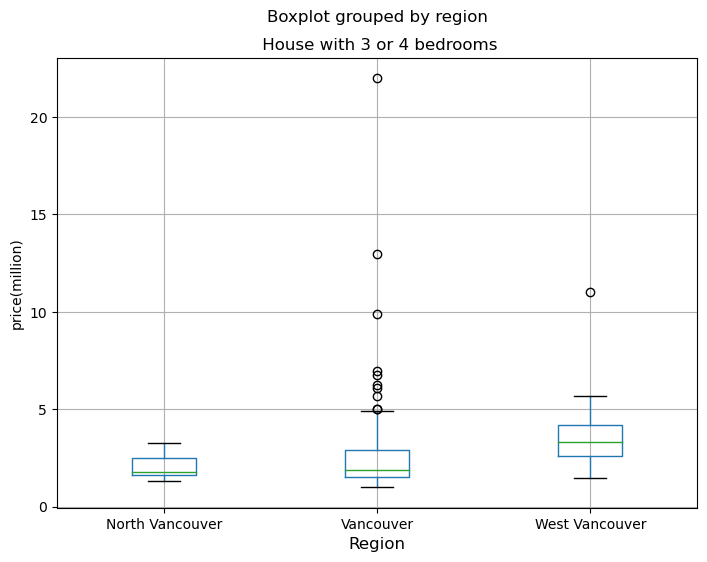

In [1078]:
bds4_house1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' House with 3 or 4 bedrooms');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1079]:
## Find Top 20 price
bds4_house2 = house2[['price(million)','address']]
bds4_house2.sort_values(by = 'price(million)', ascending=False).head(20)['address']

482         1738 Angus Drive
134         3989 Angus Drive
483    4208 Evergreen Avenue
135        4785 W 6th Avenue
834    6475 Wiltshire Street
742        692 W 39th Avenue
542     1935 Mcnicoll Avenue
6         1903 W 19th Avenue
743       3421 W 44th Avenue
323       6229 Summit Avenue
379         2090 26th Street
40     3293 Chippendale Road
74         4488 W 1st Avenue
381       868 Younette Drive
380       3491 W 36th Avenue
41     3261 Chippendale Road
42        3616 Point Grey Rd
77        6298 Cambie Street
546       2510 Queens Avenue
383        475 W 27th Avenue
Name: address, dtype: object

In [1156]:
##Define the addresses without a city name
addresses = bds4_house2.sort_values(by = 'price(million)', ascending=False).head(20)['address']

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m

In [1081]:
## house with more then 4 bedrooms
house3 = df1[(df1['types']== 'House') & (4 < df1['bds']  )]
house3

,types,bds,bths,price(million),address,region,realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
5,House,5,7,18.000,1428 Devonshire Crescent,Vancouver,Laboutique Realty
10,House,5,2,2.499,4549 W 11th Avenue,Vancouver,Sunstar Realty Ltd.
11,House,5,3,2.350,810 Handsworth Road,North Vancouver,Sincere Real Estate Services
13,House,5,4,2.000,2691 William Street,Vancouver,Multiple Realty Ltd.
...,...,...,...,...,...,...,...
976,House,5,6,4.695,598 St. Andrews Road,West Vancouver,Sotheby's International Realty Canada
977,House,8,5,4.490,4318 W 11th Avenue,Vancouver,LeHomes Realty Premier
978,House,6,5,4.380,2295 W 19th Avenue,Vancouver,Homeland Realty
1009,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1082]:
bds5_house = house3.groupby('region')['price(million)'].aggregate(['min','max','mean']).round(2)
bds5_house

,min,max,mean
region,,,
North Vancouver,1.500,4.260,2.620
Vancouver,1.200,18.000,3.940
West Vancouver,2.390,35.890,6.340


In [1083]:
bds5_house1 = house3[['price(million)','region']]
bds5_house1

,price(million),region
1,2.758,West Vancouver
5,18.000,Vancouver
10,2.499,Vancouver
11,2.350,North Vancouver
13,2.000,Vancouver
...,...,...
976,4.695,West Vancouver
977,4.490,Vancouver
978,4.380,Vancouver
1009,14.980,West Vancouver


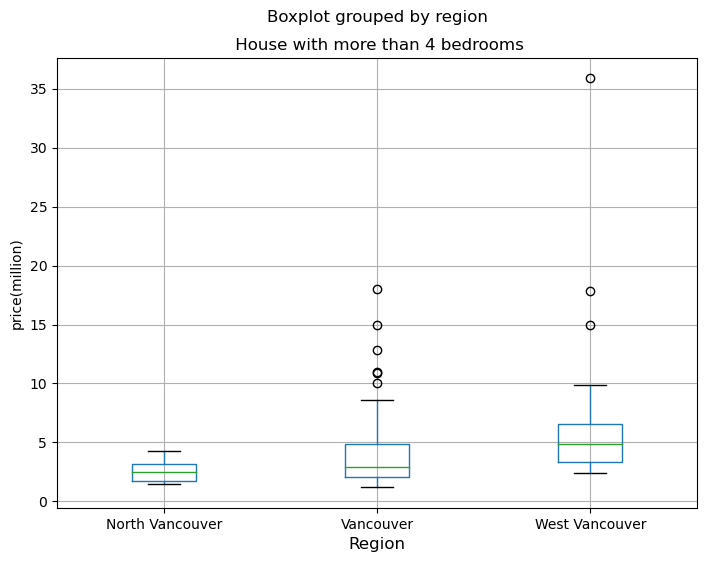

In [1084]:
bds5_house1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' House with more than 4 bedrooms');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1085]:
## Find Top 20 price
bds5_house2 = house3[['price(million)','address']]
bds5_house2.sort_values(by = 'price(million)', ascending=False).head(20)['address']

39             730 Fairmile Road
5       1428 Devonshire Crescent
133           1430 Bramwell Road
888         1626 Avondale Avenue
1009          1337 Camridge Road
333          1712 Cedar Crescent
539            3369 The Crescent
206             5755 Angus Drive
890        6869 Beechwood Street
1010          1466 Bramwell Road
540           1365 Cammeray Road
136          4129 Burkehill Road
484            4408 W 3rd Avenue
207           4027 W 28th Avenue
891             3595 Puget Drive
739           3272 W 27th Avenue
376           2446 Halston Court
137            1195 Renton Place
138          4161 Crown Crescent
670           4830 Hudson Street
Name: address, dtype: object

In [1157]:
##Define the addresses without a city name
addresses = bds5_house2.sort_values(by = 'price(million)', ascending=False).head(20)['address']

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m

###  4.3 Condos Price Analysis

#### 4.31 General Condos Price

In [1138]:
df1

,types,bds,bths,price(million),address,region,realty
0,House,2,3,1.799,4089 Ash Street,Vancouver,Macdonald Realty
1,House,5,3,2.758,3115 Benbow Road,West Vancouver,"Sutton Group-West Coast Realty, Sotheby's Int..."
2,House,3,3,1.350,1215 E 27th Avenue,Vancouver,Macdonald Realty
3,Commercial,0,0,0.418,10506 Confidential,Vancouver,SaveEditRemoveView
4,Commercial,0,0,0.178,3364 Cambie Street,Vancouver,SaveEditRemoveView
...,...,...,...,...,...,...,...
1006,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group
1007,Condo,1,1,0.499,304 1330 Marine Drive,North Vancouver,Coldwell Banker Prestige Realty
1008,Commercial,0,0,0.299,6459 Victoria Drive,Vancouver,SaveEditRemoveView
1009,House,6,8,14.980,1337 Camridge Road,West Vancouver,Sutton Group-West Coast Realty


In [1139]:
## general look for house price in each region
condo = df1[(df1['types']== 'Condo')]
condo 

,types,bds,bths,price(million),address,region,realty
7,Condo,3,3,5.888,2502 1233 W Cordova Street,Vancouver,Century 21 In Town Realty
12,Condo,2,2,2.289,209 6707 Nelson Avenue,West Vancouver,VIRANI REAL ESTATE ADVISORS
18,Condo,2,2,1.499,503 4675 Cambie Street,Vancouver,Dracco Pacific Realty
20,Condo,2,2,1.250,407 3220 Connaught Crescent,North Vancouver,Royal LePage Sussex
21,Condo,2,2,1.099,224 2083 W 33rd Avenue,Vancouver,Pacific Evergreen Realty Ltd.
...,...,...,...,...,...,...,...
1003,Condo,2,2,1.138,1202 1111 Haro Street,Vancouver,Sutton Group-West Coast Realty
1004,Condo,1,1,0.590,Ph4 4818 Eldorado Mews,Vancouver,Macdonald Realty Westmar
1005,Condo,1,1,0.579,310 5058 Joyce Street,Vancouver,Birds Nest Properties
1006,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group


In [1140]:
condo_general = condo.groupby(['region', 'bds'])['price(million)'].mean().round(2)
condo_general

region           bds
North Vancouver  1     0.680
                 2     1.010
                 3     1.770
                 4     3.900
Vancouver        1     0.670
                 2     1.260
                 3     2.330
                 4     4.270
                 5     0.900
                 7     4.990
West Vancouver   1     0.920
                 2     1.580
                 3     2.550
Name: price(million), dtype: float64

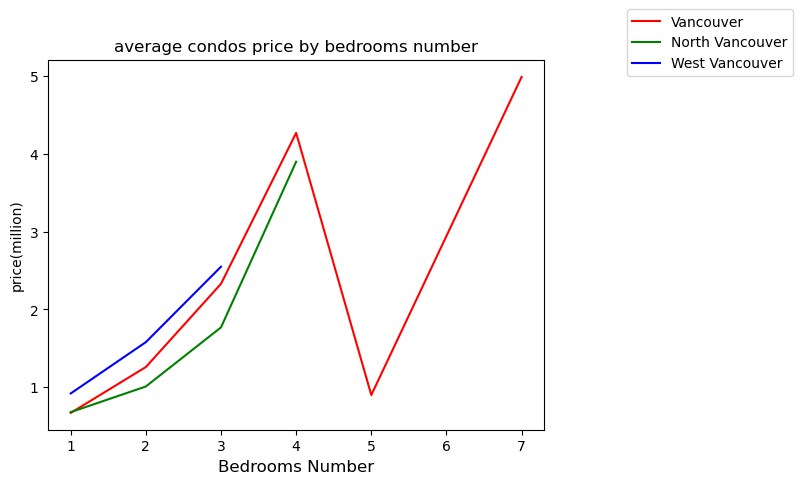

In [1090]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    condo_general['Vancouver'].plot(color="r")
    condo_general['North Vancouver'].plot(color="g")
    condo_general['West Vancouver'].plot(color="b")
    plt.title('average condos price by bedrooms number')
    plt.xlabel('Bedrooms Number', fontsize=12);
    plt.ylabel('price(million)', fontsize=10);
    plt.legend(labels = ['Vancouver','North Vancouver','West Vancouver'],loc="upper right",bbox_to_anchor=(1.3,1),bbox_transform=plt.gcf().transFigure)

#### 4.32 Condos Price by Bedrooms Number

In [1141]:
## Condos with 1 bedroom
condo1 = df1[(df1['types']== 'Condo') & ( df1['bds'] == 1 )]
condo1

,types,bds,bths,price(million),address,region,realty
23,Condo,1,1,0.918,501 889 Pacific Street,Vancouver,Dracco Pacific Realty
26,Condo,1,1,0.800,1403 89 Nelson Street,Vancouver,Engel & Volkers Vancouver
27,Condo,1,1,0.729,1607 8555 Granville Street,Vancouver,Royal Pacific Realty Corp.
29,Condo,1,1,0.675,402 1750 Esquimalt Avenue,West Vancouver,Royal LePage Sterling Realty
30,Condo,1,2,0.639,206 1535 Chesterfield Avenue,North Vancouver,Royal LePage Sussex
...,...,...,...,...,...,...,...
966,Condo,1,1,0.425,317 22 E Cordova Street,Vancouver,Oakwyn Realty Ltd.
1004,Condo,1,1,0.590,Ph4 4818 Eldorado Mews,Vancouver,Macdonald Realty Westmar
1005,Condo,1,1,0.579,310 5058 Joyce Street,Vancouver,Birds Nest Properties
1006,Condo,1,1,0.575,1003 550 Taylor Street,Vancouver,Faith Wilson Group


In [1142]:
bds1_condo = condo1.groupby('region')['price(million)'].aggregate(['min','max','mean']).round(2)
bds1_condo

,min,max,mean
region,,,
North Vancouver,0.470,0.950,0.680
Vancouver,0.220,1.260,0.670
West Vancouver,0.430,1.320,0.920


In [1143]:
bds1_condo1 = condo1[['price(million)','region']]
bds1_condo1

,price(million),region
23,0.918,Vancouver
26,0.800,Vancouver
27,0.729,Vancouver
29,0.675,West Vancouver
30,0.639,North Vancouver
...,...,...
966,0.425,Vancouver
1004,0.590,Vancouver
1005,0.579,Vancouver
1006,0.575,Vancouver


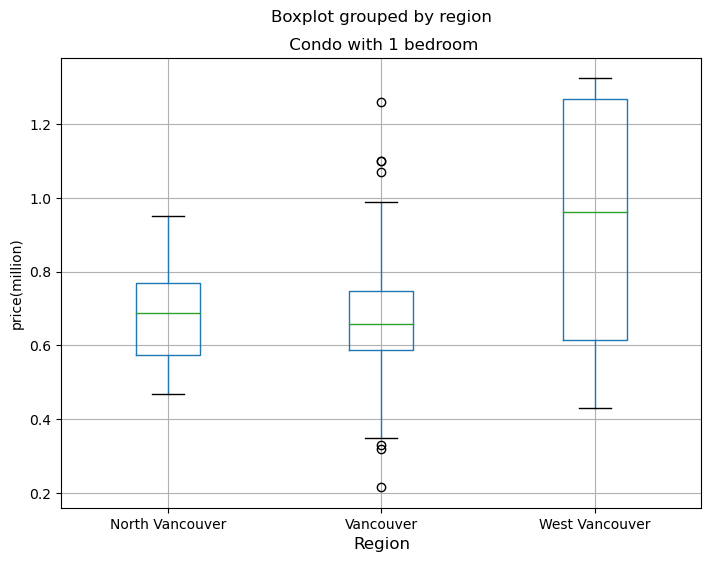

In [1144]:
bds1_condo1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' Condo with 1 bedroom');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1145]:
## Find Top 20 price
bds1_condo2 = condo1[['price(million)','address']]
## remove all unit number
bds1_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)


331        2246 Bellevue Avenue
61           5733 Cambie Street
102        1355 Bellevue Avenue
690        1477 W Pender Street
689        1477 W Pender Street
513           828 Cambie Street
407           1540 W 2nd Avenue
617         1661 Ontario Street
64            Capilano Crescent
113        1495 Richards Street
65          1372 Seymour Street
183          4240 Cambie Street
408    5380 Crooked Branch Road
23           889 Pacific Street
280        2200 Highbury Street
519          620 Cardero Street
621        175 Victory Ship Way
282            89 Nelson Street
623         788 Richards Street
875        1495 Richards Street
Name: address, dtype: object

In [1158]:

##Define the addresses without a city name
addresses = bds1_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m

In [1147]:
## Condos with 2 bedrooms
condo2 = df1[(df1['types']== 'Condo') & ( df1['bds'] == 2 )]
condo2

,types,bds,bths,price(million),address,region,realty
12,Condo,2,2,2.289,209 6707 Nelson Avenue,West Vancouver,VIRANI REAL ESTATE ADVISORS
18,Condo,2,2,1.499,503 4675 Cambie Street,Vancouver,Dracco Pacific Realty
20,Condo,2,2,1.250,407 3220 Connaught Crescent,North Vancouver,Royal LePage Sussex
21,Condo,2,2,1.099,224 2083 W 33rd Avenue,Vancouver,Pacific Evergreen Realty Ltd.
22,Condo,2,2,0.949,402 1189 Melville Street,Vancouver,Royal Pacific Tri-Cities Realty
...,...,...,...,...,...,...,...
994,Condo,2,2,1.500,605 590 Nicola Street,Vancouver,RE/MAX Masters Realty
995,Condo,2,2,1.488,1701 1632 Lions Gate Lane,North Vancouver,RE/MAX Masters Realty
998,Condo,2,2,1.398,203 5058 Cambie Street,Vancouver,RE/MAX Select Properties
1000,Condo,2,2,1.198,306 7828 Granville Street,Vancouver,RE/MAX Crest Realty


In [1148]:
bds2_condo = condo2.groupby('region')['price(million)'].aggregate(['min','max','mean']).round(2)
bds2_condo

,min,max,mean
region,,,
North Vancouver,0.500,2.600,1.010
Vancouver,0.480,4.500,1.260
West Vancouver,0.850,2.600,1.580


In [1149]:
bds2_condo1 = condo2[['price(million)','region']]
bds2_condo1

,price(million),region
12,2.289,West Vancouver
18,1.499,Vancouver
20,1.250,North Vancouver
21,1.099,Vancouver
22,0.949,Vancouver
...,...,...
994,1.500,Vancouver
995,1.488,North Vancouver
998,1.398,Vancouver
1000,1.198,Vancouver


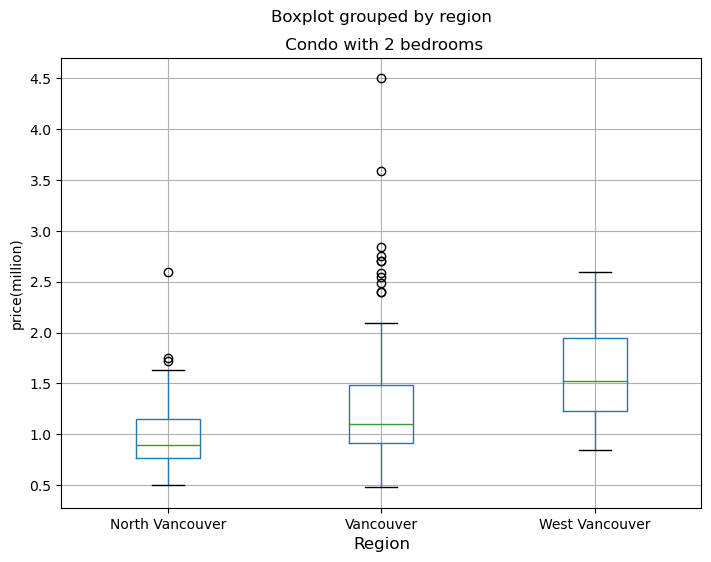

In [1150]:
bds2_condo1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' Condo with 2 bedrooms');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1151]:
## Find Top 20 price
bds2_condo2 = condo2[['price(million)','address']]
## remove all unit number
bds2_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)


835          628 Kinghorne Mews
750            170 Athletes Way
901       1281 W Cordova Street
565       838 W Hastings Street
765            1480 Howe Street
679         777 Richards Street
326            124 W 1st Street
330         3101 Burfield Place
393               8 Smithe Mews
439         1985 Alberni Street
571    1033 Marinaside Crescent
575          1171 Jervis Street
986            977 W 8th Avenue
12           6707 Nelson Avenue
50     1077 Marinaside Crescent
712            1600 Howe Street
581           1331 Marine Drive
582        1616 Columbia Street
684               8 Smithe Mews
155          2135 Argyle Avenue
Name: address, dtype: object

In [1159]:
##Define the addresses without a city name
addresses = bds2_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m

In [1103]:
## Condos with 3 bedrooms
condo3 = df1[(df1['types']== 'Condo') & ( df1['bds'] == 3 )]
condo3

,types,bds,bths,price(million),address,region,realty
7,Condo,3,3,5.888,2502 1233 W Cordova Street,Vancouver,Century 21 In Town Realty
85,Condo,3,3,2.588,3703 689 Abbott Street,Vancouver,RE/MAX Masters Realty
98,Condo,3,2,1.598,1609 3355 Binning Road,Vancouver,Dracco Pacific Realty
157,Condo,3,3,1.890,601 5033 Cambie Street,Vancouver,LDG Realty
159,Condo,3,3,1.788,504 4963 Cambie Street,Vancouver,LDG Realty
168,Condo,3,3,1.588,505 5033 Cambie Street,Vancouver,LDG Realty
169,Condo,3,3,1.588,501 5077 Cambie Street,Vancouver,LDG Realty
173,Condo,3,2,1.399,1205 283 Davie Street,Vancouver,Oakwyn Realty Ltd.
188,Condo,3,2,0.730,102 3680 Rae Avenue,Vancouver,Multiple Realty Ltd.
213,Condo,3,4,4.880,Ph1 777 Richards Street,Vancouver,"RE/MAX Crest Realty, Century 21 Coastal Realt..."


In [1105]:
bds3_condo = condo3.groupby('region')['price(million)'].aggregate(['min','max','mean']).round(2)
bds3_condo

,min,max,mean
region,,,
North Vancouver,0.850,4.100,1.770
Vancouver,0.730,5.890,2.330
West Vancouver,2.200,2.850,2.550


In [834]:
bds3_condo1 = condo3[['price(million)','region']]
bds3_condo1

,price(million),region
7,5.888,Vancouver
85,2.588,Vancouver
99,1.598,Vancouver
158,1.890,Vancouver
160,1.788,Vancouver
169,1.588,Vancouver
170,1.588,Vancouver
174,1.399,Vancouver
189,0.730,Vancouver
214,4.880,Vancouver


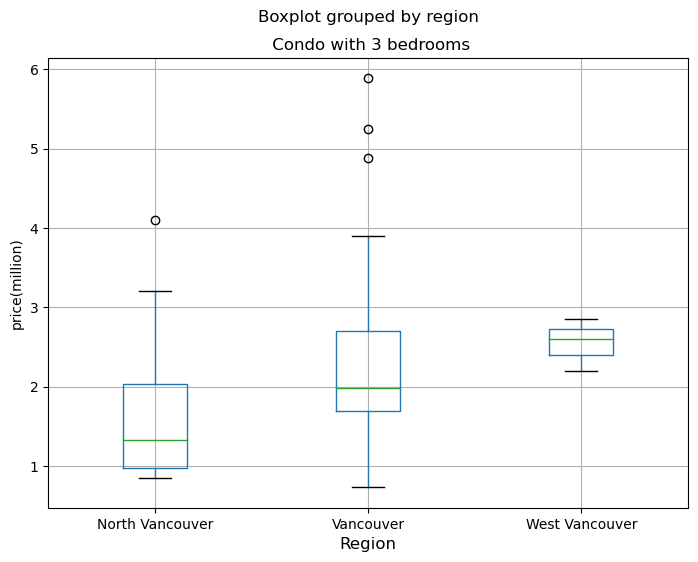

In [1106]:
bds3_condo1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' Condo with 3 bedrooms');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1107]:
## Find Top 20 price
bds3_condo2 = condo3[['price(million)','address']]
## remove all unit number
bds3_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)


7      1233 W Cordova Street
545          1560 Homer Mews
213      777 Richards Street
836     1632 Lions Gate Lane
489       1171 Jervis Street
753        3355 Binning Road
432     1675 Lions Gate Lane
759      1717 Bayshore Drive
760         499 Drake Street
490          89 W 2nd Avenue
221       1102 Hornby Street
900         1283 Howe Street
563        1331 Marine Drive
566       889 Pacific Street
435     1111 Richards Street
839       5118 Cambie Street
438       6707 Nelson Avenue
568       499 Pacific Street
85         689 Abbott Street
569          6093 Iona Drive
Name: address, dtype: object

In [1160]:
##Define the addresses without a city name
addresses = bds3_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m

In [1109]:
## Condos with more than 3 bedrooms
condo4 = df1[(df1['types']== 'Condo') & ( df1['bds'] > 3 )]
condo4

,types,bds,bths,price(million),address,region,realty
67,Condo,5,2,0.895,517 Commercial Drive,Vancouver,RE/MAX Westcoast
426,Condo,7,7,4.988,1401 1238 Seymour Street,Vancouver,RE/MAX Westcoast
487,Condo,4,5,4.948,1203 535 Nicola Street,Vancouver,LDG Realty
551,Condo,4,4,3.900,1901 1675 Lions Gate Lane,North Vancouver,Behroyan & Associates Real Estate Services
705,Condo,4,3,3.600,1803 1708 Ontario Street,Vancouver,Anson Realty Ltd.


In [1110]:
bds4_condo = condo4.groupby('region')['price(million)'].aggregate(['min','max','mean']).round(2)
bds4_condo

,min,max,mean
region,,,
North Vancouver,3.900,3.900,3.900
Vancouver,0.900,4.990,3.610


In [1111]:
bds4_condo1 = condo4[['price(million)','region']]
bds4_condo1 

,price(million),region
67,0.895,Vancouver
426,4.988,Vancouver
487,4.948,Vancouver
551,3.900,North Vancouver
705,3.600,Vancouver


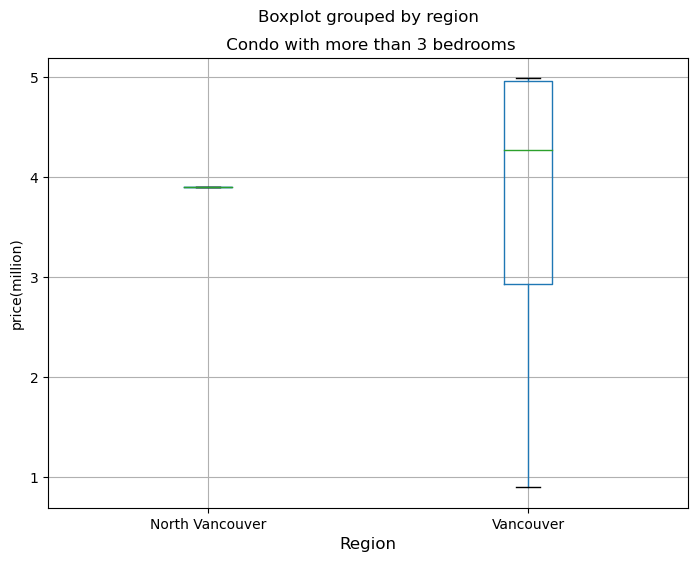

In [1112]:
bds4_condo1.boxplot(by='region', column='price(million)', figsize=(8,6)).set_title(' Condo with more than 3 bedrooms');

plt.xlabel('Region', fontsize=12);
plt.ylabel('price(million)', fontsize=10);

In [1164]:
## Find Top 20 price
bds4_condo2 = condo4[['price(million)','address']]
## remove all unit number
bds4_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)


426     1238 Seymour Street
487       535 Nicola Street
551    1675 Lions Gate Lane
705     1708 Ontario Street
67         Commercial Drive
Name: address, dtype: object

In [1165]:
##Define the addresses without a city name
addresses = bds4_condo2.sort_values(by = 'price(million)', ascending=False).head(20)['address'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else x)

##Create a geolocator object
geolocator = Nominatim(user_agent='myapplication')

##Create an empty list to store the locations
locations = []

##Iterate over the addresses and get the latitude and longitude coordinates
for address in addresses:
    ##Add the default city to the address string
    address_with_city = address + ', Vancouver'
    location = geolocator.geocode(address_with_city)
    if location is not None:
        locations.append((location.latitude, location.longitude))

##Create a folium map centered on the first location
m = folium.Map(location=locations[0], zoom_start=10)

##Add markers for each location
for location in locations:
    folium.Marker(location=location).add_to(m)

##Display the map
m